In [ ]:
#1
#download source data from internet
from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')


In [ ]:
#2
#import libraries
import gzip
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
#3
#read mnist data from source 
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [ ]:
#4
#implementation test and train data
train = {}
test = {}

train['features'], train['labels'] = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')


In [ ]:
#5
#display image function
def display_image(position):
    image = train['features'][position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

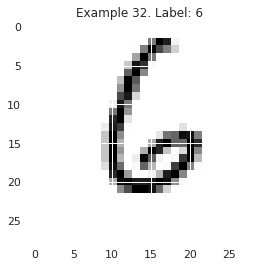

In [ ]:
display_image(32)

In [ ]:
#6
#seperation of zeros, ones, ... , nines
resultOfZeros = np.where(train['labels'] == 0)
print('len(resultOfZeros): ', len(resultOfZeros[0]))
resultOfOnes = np.where(train['labels'] == 1)
print('len(resultOfOnes): ', len(resultOfOnes[0]))
resultOfTwos = np.where(train['labels'] == 2)
print('len(resultOfTwos): ', len(resultOfTwos[0]))
resultOfThrees = np.where(train['labels'] == 3)
print('len(resultOfThrees): ', len(resultOfThrees[0]))
resultOfFours = np.where(train['labels'] == 4)
print('len(resultOfFours): ', len(resultOfFours[0]))
resultOfFives = np.where(train['labels'] == 5)
print('len(resultOfFives): ', len(resultOfFives[0]))
resultOfSixes = np.where(train['labels'] == 6)
print('len(resultOfSixes): ', len(resultOfSixes[0]))
resultOfSevens = np.where(train['labels'] == 7)
print('len(resultOfSevens): ', len(resultOfSevens[0]))
resultOfEights = np.where(train['labels'] == 8)
print('len(resultOfEights): ', len(resultOfEights[0]))
resultOfNines = np.where(train['labels'] == 9)
print('len(resultOfNines): ', len(resultOfNines[0]))

len(resultOfZeros):  5923
len(resultOfOnes):  6742
len(resultOfTwos):  5958
len(resultOfThrees):  6131
len(resultOfFours):  5842
len(resultOfFives):  5421
len(resultOfSixes):  5918
len(resultOfSevens):  6265
len(resultOfEights):  5851
len(resultOfNines):  5949


In [ ]:
#7
#display image which combined 2 image in horizontally and labeled 
def display_image2(position,position2):   ##combined 2 array in numpy and display
    image = train['features'][position].squeeze()
    image2 = train['features'][position2].squeeze()
    print(type(image[0][0]))
    print(type(train['labels'][position]))
    image3 = (np.hstack((image, image2)))
    #plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    print(train['labels'][position]*10+train['labels'][position2])
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]+train['labels'][position2]))
    plt.imshow(image3, cmap=plt.cm.gray_r)

<class 'numpy.uint8'>
<class 'numpy.uint8'>
95


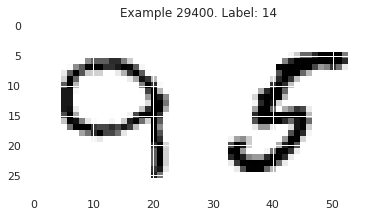

In [ ]:
#8
#try display_image2()
display_image2(29400,22329)

In [ ]:
#9
#combination of 2 images and labeled
def combine2Images(firstImagePos,secondImagePos):   ##combined 2 array in numpy and display
    
    image = train['features'][firstImagePos].squeeze()
    image2 = train['features'][secondImagePos].squeeze()
    combinedImage = (np.hstack((image, image2)))
    combinedLabel = train['labels'][firstImagePos]+train['labels'][secondImagePos]
    return combinedImage, combinedLabel

(28, 56)


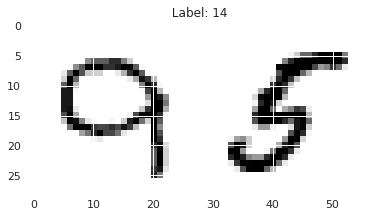

In [ ]:
#10
#try combine2Images()
combinedImageWork, combinedLabelWork = combine2Images(29400,22329)
plt.title(' Label: %d' % ( combinedLabelWork))
plt.imshow(combinedImageWork, cmap=plt.cm.gray_r)
print(combinedImageWork.shape)

In [ ]:
#11
#foo and fooLabel is fulled
import random
import numpy as np

i=0   #first digit of data
j=0   #second digit of data
k=0  #for 1000 sample
#foo = np.zeros((100,1000,2),dtype=np.ndarray)
foo = np.zeros((100000,28,56),dtype=np.uint8)
fooLabel = np.zeros((100000),dtype=np.uint8)
trainDataImage = np.zeros((90000,28,56),dtype=np.uint8)
trainDataLabel = np.zeros((90000),dtype=np.uint8)
testDataImage = np.zeros((10000,28,56),dtype=np.uint8)
testDataLabel = np.zeros((10000),dtype=np.uint8)
while(i<10):#first digit of pictures and labels
  #data selection for first digit
  if(i==0):
    dataSource=resultOfZeros
  elif(i==1):
    dataSource=resultOfOnes 
  elif(i==2):
    dataSource=resultOfTwos 
  elif(i==3):
    dataSource=resultOfThrees
  elif(i==4):
    dataSource=resultOfFours 
  elif(i==5):
    dataSource=resultOfFives 
  elif(i==6):
    dataSource=resultOfSixes
  elif(i==7):
    dataSource=resultOfSevens 
  elif(i==8):
    dataSource=resultOfEights
  elif(i==9):
    dataSource=resultOfNines 
  else:
    print("Error occured when data source initialize in i")
 
  while(j<10):#second digit of pictures and labels
    #data selection for second digit
    if(j==0):
      dataSource2=resultOfZeros
    elif(j==1):
      dataSource2=resultOfOnes 
    elif(j==2):
      dataSource2=resultOfTwos 
    elif(j==3):
      dataSource2=resultOfThrees
    elif(j==4):
      dataSource2=resultOfFours 
    elif(j==5):
      dataSource2=resultOfFives 
    elif(j==6):
      dataSource2=resultOfSixes
    elif(j==7):
      dataSource2=resultOfSevens 
    elif(j==8):
      dataSource2=resultOfEights
    elif(j==9):
      dataSource2=resultOfNines 
    else:
      print("Error occured when data source initialize in j")
    
    while(k<1000): #combined pictures and assign an array
      firstPosition = dataSource[0][random.randint(0, len(dataSource[0])-1)]
      secondPosition = dataSource2[0][random.randint(0, len(dataSource2[0])-1)]
      combinedImage, combinedLabel = combine2Images(firstPosition,secondPosition)
      foo[i*10000+j*1000+k] = combinedImage
      fooLabel[i*10000+j*1000+k] = combinedLabel
      k=k+1
    k=0
    j=j+1
  j=0
  i=i+1


print(type(trainDataImage[0]))
print(type(trainDataLabel[0]))
print(trainDataImage[0].shape)
print(testDataImage[0].shape)

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
(28, 56)
(28, 56)


In [ ]:
#12
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPool2D

In [ ]:
#13
#generate ten number for randnums
import random
randnums = random.sample(range(0,100), 10)
testIndex=0
trainIndex=0
print(randnums)
randnums = sorted(randnums, reverse=False)
print(randnums)

[23, 42, 73, 48, 45, 97, 81, 94, 76, 29]
[23, 29, 42, 45, 48, 73, 76, 81, 94, 97]


In [ ]:
#14
#separate foo array to trainDataImage,trainDataLabel and testDataImage,testDataLabel
randomIndex=0
k=0
fooIndex=0
trainIndex=0
testIndex=0
l=0
trainDataImage = np.zeros((90000,28,56),dtype=np.uint8)
trainDataLabel = np.zeros((90000),dtype=np.uint8)
testDataImage = np.zeros((10000,28,56),dtype=np.uint8)
testDataLabel = np.zeros((10000),dtype=np.uint8)

while(l<100000):
  if(k<10):
    print(str(randnums[k]*1000))
    if(randnums[k]*1000 <= fooIndex < (randnums[k]+1)*1000):
      testDataImage[testIndex]=foo[fooIndex]
      testDataLabel[testIndex]=fooLabel[fooIndex]
      testIndex=testIndex+1
      fooIndex=fooIndex+1
    else:
      trainDataImage[trainIndex]=foo[fooIndex]
      trainDataLabel[trainIndex]=fooLabel[fooIndex]
      trainIndex=trainIndex+1
      fooIndex=fooIndex+1
    if((randnums[k]+1)*1000==fooIndex):
      k=k+1
  else:
      trainDataImage[trainIndex]=foo[fooIndex]
      trainDataLabel[trainIndex]=fooLabel[fooIndex]
      trainIndex=trainIndex+1
      fooIndex=fooIndex+1
  #print(str(l)+ " :l+  k="+str(k) +" fooIndex: "+str(fooIndex)+" trainIndex: "+str(trainIndex) + " testIndex: "+str(testIndex))
  l=l+1



In [ ]:
#15
#from https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# change type to uint8 to float32
trainDataImage = trainDataImage.astype('float32')
testDataImage = testDataImage.astype('float32')

#image to gray scale
trainDataImage /= 255
testDataImage /= 255

def modelTrain():
  # Define the K-fold Cross Validator
  #10-fold Cross Calidator
  kfold = KFold(n_splits=1, shuffle=True)

  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(trainDataImage, trainDataLabel):
    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,56,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
  return model

In [ ]:
#16
#start working on model

#return model
model = modelTrain()

#optimizer ada's parameter is set
ada = tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, epsilon=1e-08)

#model compile parameters is set
model.compile(optimizer=ada,
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])

#fitting model with trainData, testData and some parameters
history = model.fit(trainDataImage, trainDataLabel, 
          epochs=10,
          batch_size=128, 
          validation_data=(testDataImage, testDataLabel))

[8.7983465]


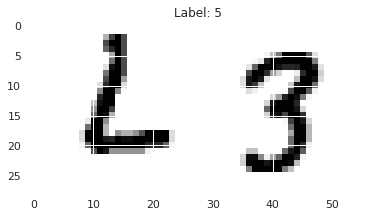

In [ ]:
#17
#predictions checking
predictions = model.predict(testDataImage)
print(predictions[755])
plt.title('Label: %d' %  testDataLabel[755])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[755].squeeze(),cmap=plt.cm.binary)
plt.show()

In [ ]:
#18 
# get the accuracy of the model
from math import floor,ceil
i=0
floorCeilNum=0
roundNum=0
while(i<10000):
  if(floor(predictions[i]) == testDataLabel[i] or ceil(predictions[i]) == testDataLabel[i]):
    floorCeilNum+=1
  if(round(float(predictions[i])) == testDataLabel[i]):
    roundNum+=1
  i+=1
print("Floored or ceiled prediction is correct = " +str(floorCeilNum)+" accuracy in 10000 samples is %" +str(floorCeilNum/100))
print("Rounded prediction is correct = " +str(roundNum)+" accuracy in 10000 samples is %" +str(roundNum/100))

Floored or ceiled prediction is correct = 2000 accuracy in 10000 samples is %20.0
Rounded prediction is correct = 2000 accuracy in 10000 samples is %20.0


In [ ]:
#alternative version v1
#source : https://www.kaggle.com/curiousprogrammer/lenet-5-cnn-with-keras-99-48

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# change type to uint8 to float32
trainDataImage = trainDataImage.astype('float32')
testDataImage = testDataImage.astype('float32')

#image to gray scale
trainDataImage /= 255
testDataImage /= 255

def modelTrain():
  # Define the K-fold Cross Validator
  #10-fold Cross Calidator
  kfold = KFold(n_splits=10, shuffle=True)

  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(trainDataImage, trainDataLabel):
    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 56, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(units = 1))
  return model


In [ ]:
#source is : https://www.programcreek.com/python/example/89669/keras.layers.MaxPooling2D 

#alternative Version

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# change type to uint8 to float32
trainDataImage = trainDataImage.astype('float32')
testDataImage = testDataImage.astype('float32')

#image to gray scale
trainDataImage /= 255
testDataImage /= 255

def modelTrain():
  # Define the K-fold Cross Validator
  #10-fold Cross Calidator
  kfold = KFold(n_splits=10, shuffle=True)

  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(trainDataImage, trainDataLabel):
    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(28, 56, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(1))
  return model


10000
[11.81896]


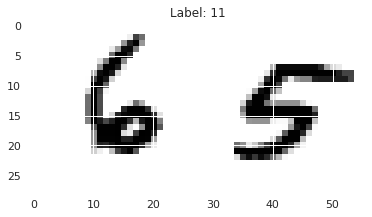

In [ ]:
#17 
#predictions checking
print(len(predictions))
print(predictions[5689])
plt.title('Label: %d' %  testDataLabel[5689])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[5689].squeeze(),cmap=plt.cm.binary)
plt.show()

[0.]


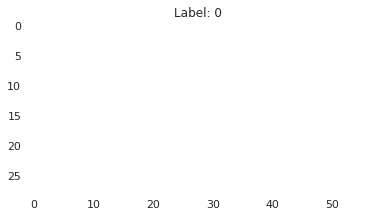

In [ ]:
print(predictions[8500])
plt.title('Label: %d' %  testDataLabel[8500])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[8500].squeeze(),cmap=plt.cm.binary)
plt.show()

[0.]


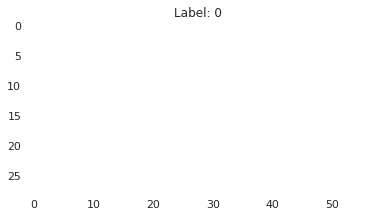

In [ ]:
print(predictions[9758])
plt.title('Label: %d' %  testDataLabel[9758])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[9758].squeeze(),cmap=plt.cm.binary)
plt.show()

[12.278471]


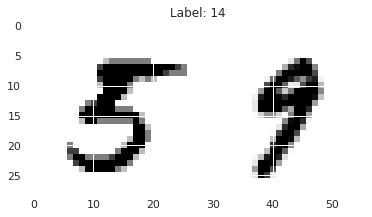

In [ ]:
print(predictions[4444])
plt.title('Label: %d' %  testDataLabel[4444])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[4444].squeeze(),cmap=plt.cm.binary)
plt.show()

[0.]


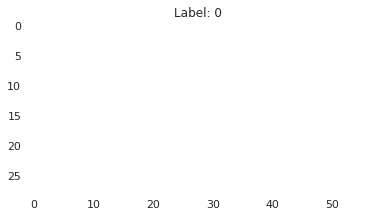

In [ ]:
print(predictions[3333])
plt.title('Label: %d' %  testDataLabel[3333])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[3333].squeeze(),cmap=plt.cm.binary)
plt.show()

[5.193051]


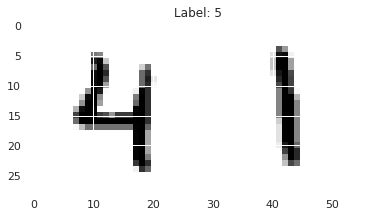

In [ ]:
print(predictions[2222])
plt.title('Label: %d' %  testDataLabel[2222])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[2222].squeeze(),cmap=plt.cm.binary)
plt.show()

[12.085421]


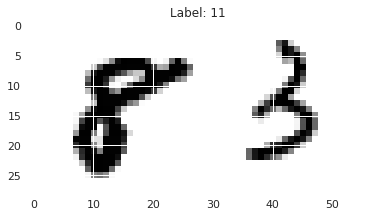

In [ ]:
print(predictions[6666])
plt.title('Label: %d' %  testDataLabel[6666])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[6666].squeeze(),cmap=plt.cm.binary)
plt.show()

[9.595124]


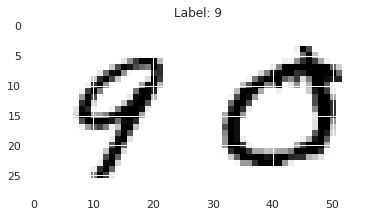

In [ ]:
print(predictions[7777])
plt.title('Label: %d' %  testDataLabel[7777])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[7777].squeeze(),cmap=plt.cm.binary)
plt.show()

[9.9429]


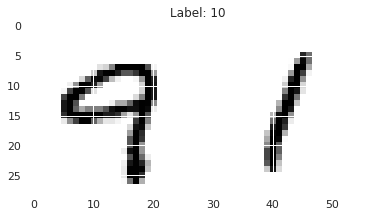

In [ ]:
print(predictions[8888])
plt.title('Label: %d' %  testDataLabel[8888])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[8888].squeeze(),cmap=plt.cm.binary)
plt.show()

[7.9031167]


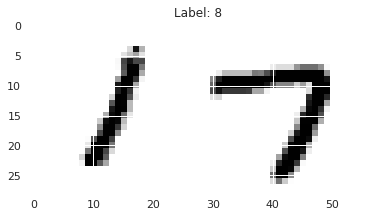

In [ ]:
print(predictions[488])
plt.title('Label: %d' %  testDataLabel[488])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[488].squeeze(),cmap=plt.cm.binary)
plt.show()

[7.265822]


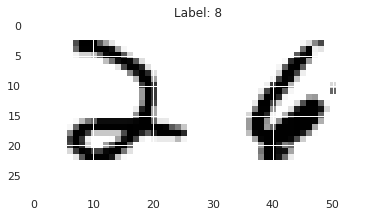

In [ ]:
print(predictions[1245])
plt.title('Label: %d' %  testDataLabel[1245])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[1245].squeeze(),cmap=plt.cm.binary)
plt.show()

[8.191742]


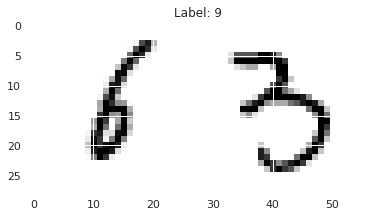

In [ ]:
print(predictions[4212])
plt.title('Label: %d' %  testDataLabel[4212])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[4212].squeeze(),cmap=plt.cm.binary)
plt.show()

[9.537987]


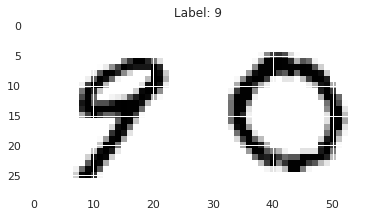

In [ ]:
print(predictions[7648])
plt.title('Label: %d' %  testDataLabel[7648])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[7648].squeeze(),cmap=plt.cm.binary)
plt.show()

[14.675799]


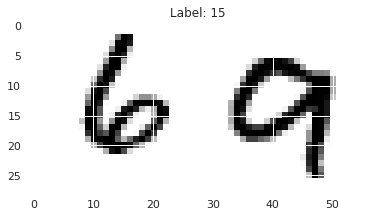

In [ ]:
print(predictions[5421])
plt.title('Label: %d' %  testDataLabel[5421])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[5421].squeeze(),cmap=plt.cm.binary)
plt.show()

[14.241512]


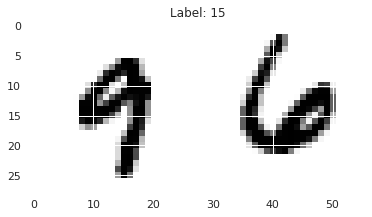

In [ ]:
print(predictions[9845])
plt.title('Label: %d' %  testDataLabel[9845])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[9845].squeeze(),cmap=plt.cm.binary)
plt.show()